In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

np.random.seed(2)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('creditcard.csv')

## Data Exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre-processing

In [4]:
data['normalized_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount'], axis = 1)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
data = data.drop(['Time'], axis = 1)

In [7]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
X = data.iloc[:, data.columns != 'Class']
Y = data.iloc[:, data.columns == 'Class']

In [9]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [10]:
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((199364, 29), (85443, 29), (199364, 1), (85443, 1))

In [13]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

In [14]:
model = Sequential()

In [15]:
model.add(Dense(16, input_dim = 29, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

### Training

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
199364/199364 [==============================] - 35s 173us/step - loss: 0.0096 - accuracy: 0.9978
Epoch 2/5
199364/199364 [==============================] - 35s 176us/step - loss: 0.0038 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 33s 165us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
199364/199364 [==============================] - 34s 172us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.99 - 33s 168us/step - loss: 0.0032 - accuracy: 0.9994


In [18]:
score = model.evaluate(x_test, y_test)

85443/85443 [==============================] - 2s 29us/step


In [19]:
print(score)

[0.004372208460927552, 0.9994031190872192]


In [53]:
def plot_cnf(cn):
    print('Confusion matrix, without normalization')
    print(cn)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cn, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(cn.shape[0]):
         for j in range(cn.shape[1]):
             ax.text(x=j, y=i,
                    s=cn[i, j], 
                    va='center', ha='center')
    plt.xlabel('Predicted labels', )
    plt.ylabel('True labels')

In [22]:
y_pred = model.predict(x_test)
y_test = pd.DataFrame(y_test)

In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

Confusion matrix, without normalization
[[85276    20]
 [   31   116]]


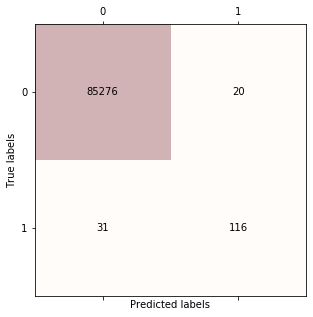

In [25]:
plot_cnf(cnf_matrix)
plt.show()

Confusion matrix, without normalization
[[284246     69]
 [   102    390]]


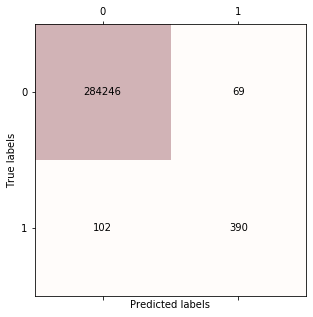

In [26]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(Y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

plot_cnf(cnf_matrix)
plt.show()

## Undersampling

In [27]:
fraud_indices = np.array(data[data.Class == 1].index)
num_records_fraud = len(fraud_indices)
print(num_records_fraud)

492


In [28]:
normal_indices = data[data.Class == 0].index

In [29]:
random_normal_indices = np.random.choice(normal_indices, num_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

In [30]:
print(len(random_normal_indices))

492


In [31]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [32]:
under_sample_data = data.iloc[under_sample_indices, :]

In [33]:
x_under_sample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_under_sample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_under_sample, y_under_sample, test_size=0.3)

In [35]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
688/688 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.9026
Epoch 2/5
688/688 [==============================] - 0s 170us/step - loss: 0.2149 - accuracy: 0.9244
Epoch 3/5
688/688 [==============================] - 0s 175us/step - loss: 0.1756 - accuracy: 0.9331
Epoch 4/5
688/688 [==============================] - 0s 173us/step - loss: 0.1517 - accuracy: 0.9404
Epoch 5/5
688/688 [==============================] - 0s 166us/step - loss: 0.1227 - accuracy: 0.9477


In [38]:
y_pred = model.predict(x_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

Confusion matrix, without normalization
[[150   0]
 [ 21 125]]


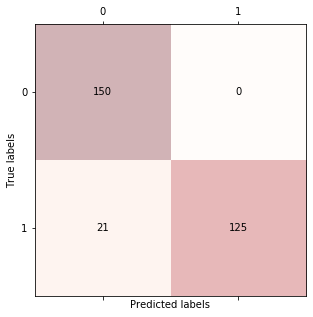

In [39]:
plot_cnf(cnf_matrix)
plt.show()

Confusion matrix, without normalization
[[492   0]
 [ 58 434]]


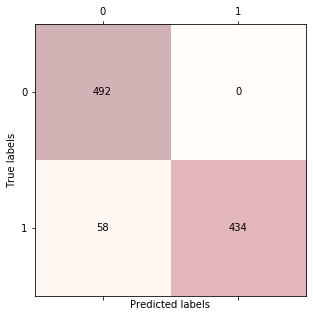

In [40]:
y_pred = model.predict(x_under_sample)
y_expected = pd.DataFrame(y_under_sample)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

plot_cnf(cnf_matrix)
plt.show()

## Smote

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
x_resample, y_resample = SMOTE().fit_sample(X, Y.values.ravel())

In [44]:
x_resample = pd.DataFrame(x_resample)
y_resample = pd.DataFrame(y_resample)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.3)

In [46]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
398041/398041 [==============================] - 75s 189us/step - loss: 0.0304 - accuracy: 0.9897
Epoch 2/5
398041/398041 [==============================] - 72s 180us/step - loss: 0.0126 - accuracy: 0.9966
Epoch 3/5
398041/398041 [==============================] - 73s 182us/step - loss: 0.0103 - accuracy: 0.9974
Epoch 4/5
398041/398041 [==============================] - 77s 193us/step - loss: 0.0091 - accuracy: 0.9978
Epoch 5/5
398041/398041 [==============================] - 74s 185us/step - loss: 0.0085 - accuracy: 0.9980


In [48]:
y_pred = model.predict(x_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

Confusion matrix, without normalization
[[84960   354]
 [   13 85262]]


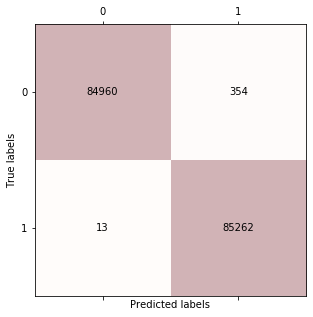

In [49]:
plot_cnf(cnf_matrix)
plt.show()

Confusion matrix, without normalization
[[283189   1126]
 [    43 284272]]


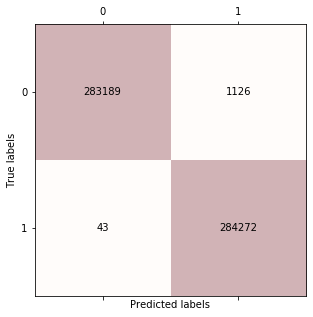

In [50]:
y_pred = model.predict(x_resample)
y_expected = pd.DataFrame(y_resample)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

plot_cnf(cnf_matrix)
plt.show()

Confusion matrix, without normalization
[[283189   1126]
 [     1    491]]


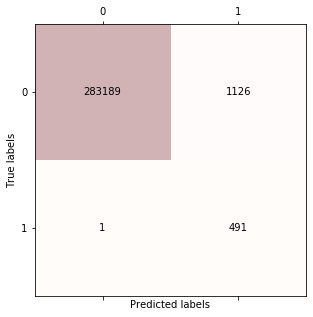

In [51]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(Y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

plot_cnf(cnf_matrix)
plt.show()